# Regressing 2D Data with a Single Neuron

This notebook provides you with a complete code example that loads the data contained in `data_reg_2d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_2d_clean_test.csv`.

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 0.09539425  0.62586094]
 [ 1.38026523  1.66483856]
 [ 0.88323335  1.21737326]
 [ 0.00583365  0.01259322]
 [-0.65958948  0.39365817]
 [-0.15699403  0.54888271]
 [-0.20260499 -0.48191721]
 [-1.04782585  0.34934672]
 [ 1.72214286 -0.10788593]
 [-0.34130321  0.26006667]]
y_gt: [[ 0.7304667 ]
 [ 0.48457333]
 [ 0.53413991]
 [ 0.20675957]
 [ 1.25324765]
 [ 0.90587675]
 [-0.07931222]
 [ 1.59717256]
 [-1.63002878]
 [ 0.80136988]]


## Visualizing the Data

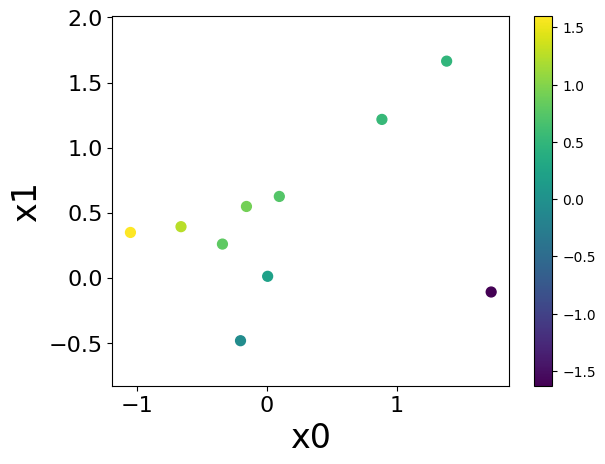

In [2]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt)

## Implementing a Neuron with Multiple Inputs

Create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [3]:
def neuron_reg_2d(w, x):
    """Artificial neuron for multidimensional regression."""
    return x @ w

... randomly initialize its weight vector ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... obtain its prediction `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_reg_2d(w, x)

... and visualize its predictions.

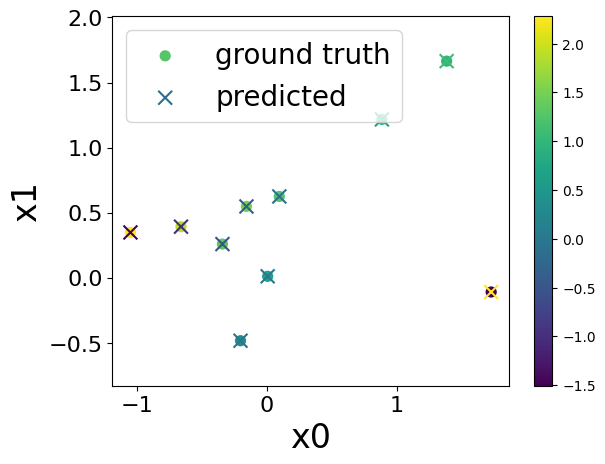

In [6]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Training the Neuron

Train the neuron ...

In [8]:
num_samples = len(x)
num_train_iterations = 100
eta = .1  # Learning rate.

for i in range(num_train_iterations):
	selected = rng.integers(0, num_samples)  # Select random sample.
	x_selected = x[selected]
	y_gt_selected = y_gt[selected]

	y_p_selected = neuron_reg_2d(w, x_selected)  # Neuron prediction.
	
	error = y_p_selected - y_gt_selected  # Calculate error.

	w = w - eta * error * x_selected  # Update neuron weight.

	print(f"i={i} w0={w[0]:.2f} w1={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=1.30 w1=-0.41 error=0.01
i=1 w0=1.30 w1=-0.41 error=0.01
i=2 w0=1.25 w1=-0.38 error=-1.35
i=3 w0=1.25 w1=-0.38 error=0.01
i=4 w0=1.11 w1=-0.29 error=-2.23
i=5 w0=0.97 w1=-0.21 error=-2.10
i=6 w0=0.97 w1=-0.21 error=-0.02
i=7 w0=0.84 w1=-0.13 error=-1.97
i=8 w0=0.77 w1=-0.20 error=0.46
i=9 w0=0.78 w1=-0.19 error=-0.10
i=10 w0=0.27 w1=-0.16 error=3.00
i=11 w0=0.06 w1=-0.09 error=-1.93
i=12 w0=0.05 w1=-0.04 error=-0.97
i=13 w0=-0.04 w1=0.01 error=-1.30
i=14 w0=0.03 w1=0.10 error=-0.52
i=15 w0=0.04 w1=0.14 error=-0.67
i=16 w0=-0.25 w1=0.16 error=1.69
i=17 w0=-0.26 w1=0.20 error=-0.78
i=18 w0=-0.26 w1=0.24 error=-0.63
i=19 w0=-0.21 w1=0.30 error=-0.47
i=20 w0=-0.43 w1=0.31 error=1.23
i=21 w0=-0.35 w1=0.40 error=-0.56
i=22 w0=-0.46 w1=0.44 error=-1.09
i=23 w0=-0.51 w1=0.47 error=-0.77
i=24 w0=-0.52 w1=0.47 error=-0.04
i=25 w0=-0.61 w1=0.50 error=-0.89
i=26 w0=-0.60 w1=0.53 error=-0.48
i=27 w0=-0.61 w1=0.56 error=-0.52
i=28 w0=-0.70 w1=0.56 error=0.51
i=29 w0=-0.74 w1=0.59 error=-0.57


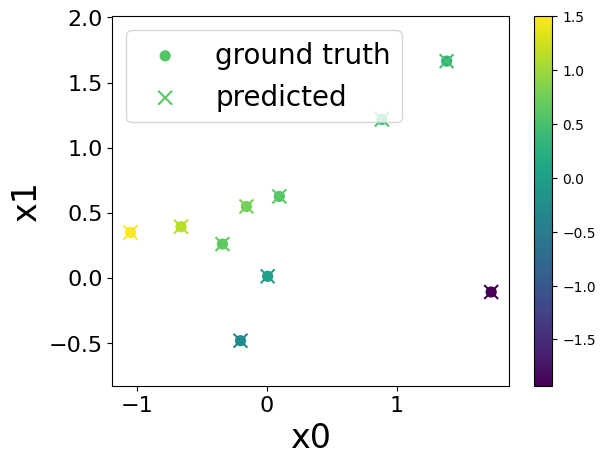

In [9]:
plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

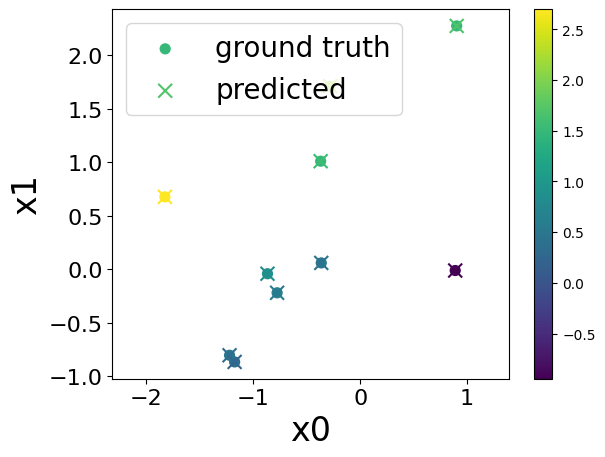

In [10]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_reg_2d(w, x_test))